In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


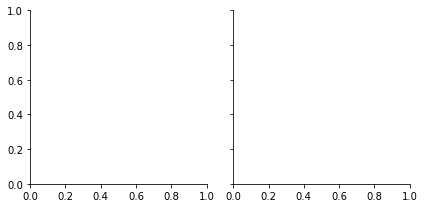

In [4]:
g=sns.FacetGrid(tips,col='time')

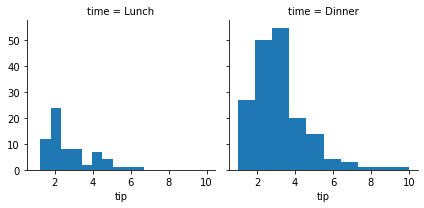

In [7]:
g=sns.FacetGrid(tips,col='time')
g.map(plt.hist,'tip')

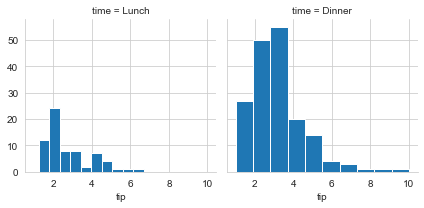

In [8]:
sns.set_style('whitegrid')
g=sns.FacetGrid(tips,col='time')
g.map(plt.hist,'tip')

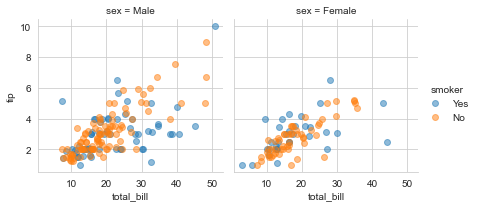

In [10]:
g=sns.FacetGrid(tips,col='sex',hue='smoker')
g.map(plt.scatter,'total_bill','tip',alpha=0.5)
g.add_legend()

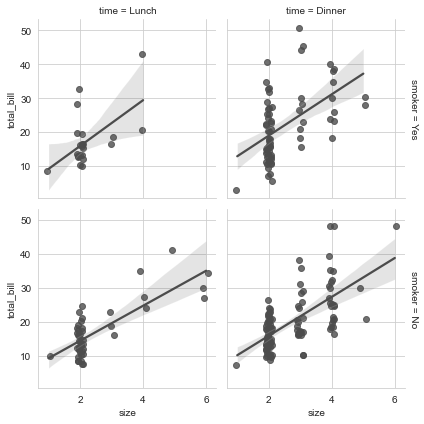

In [14]:
g=sns.FacetGrid(tips,row='smoker',col='time',margin_titles=True)
g.map(sns.regplot,'size','total_bill',color='0.3',fit_reg=True,x_jitter=0.1)

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


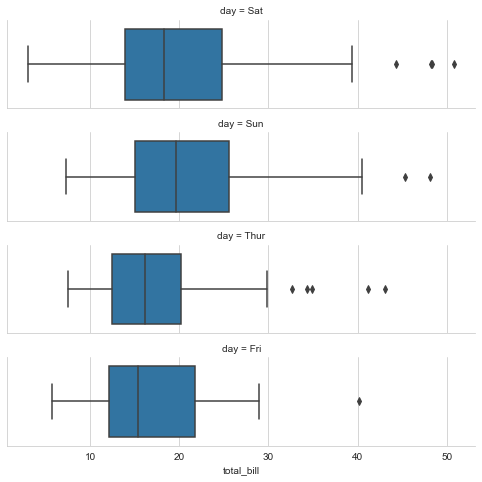

In [28]:
ordered_days=tips.day.value_counts().index
print(ordered_days)
g=sns.FacetGrid(tips,row='day',row_order=ordered_days,size=1.7,aspect=4)
g.map(sns.boxplot,'total_bill')

### 自己指定顺序

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


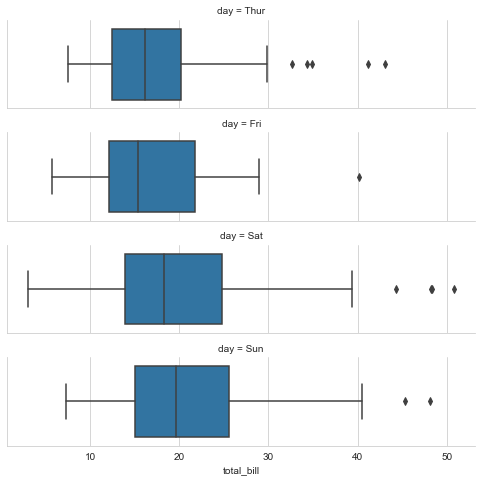

In [29]:
from pandas import Categorical
ordered_days=tips.day.value_counts().index
print(ordered_days)
ordered_days=Categorical(['Thur','Fri','Sat','Sun'])
g=sns.FacetGrid(tips,row='day',row_order=ordered_days,size=1.7,aspect=4)
g.map(sns.boxplot,'total_bill')

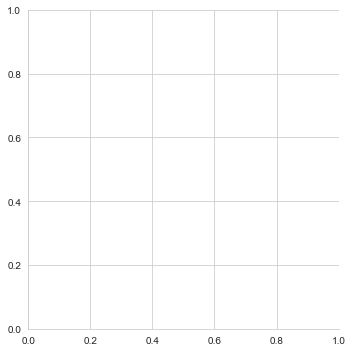

In [31]:
pal=dict(Lunch='seagreen',Dinner='gray')
g=sns.FacetGrid(tips,hue='time',palette=pal,size=5)

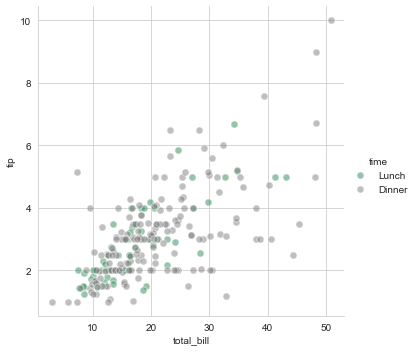

In [33]:
pal=dict(Lunch='seagreen',Dinner='gray') # 颜色设计
g=sns.FacetGrid(tips,hue='time',palette=pal,size=5)
g.map(plt.scatter,'total_bill','tip',s=50,alpha=0.5,edgecolor='white') # s表示o的大小
g.add_legend()

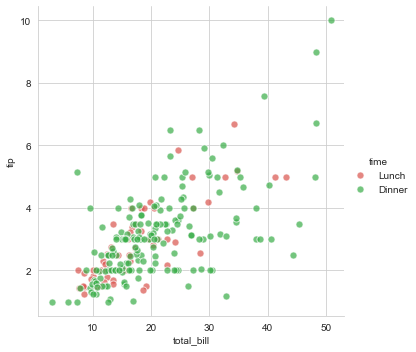

In [54]:
pal=sns.xkcd_palette(['pale red','medium green'])
g=sns.FacetGrid(tips,hue='time',palette=pal,size=5)
g.map(plt.scatter,'total_bill','tip',s=50,alpha=0.7,edgecolor='white') # s表示o的大小
g.add_legend()

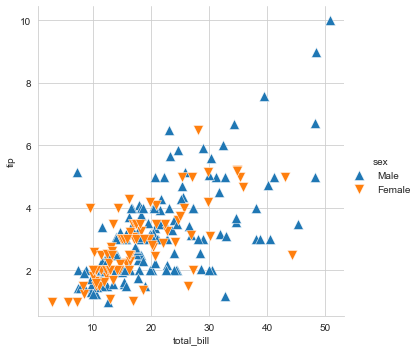

In [63]:
g=sns.FacetGrid(tips,hue='sex',size=5,hue_kws={'marker':['^','v']})
g.map(plt.scatter,'total_bill','tip',s=100,linewidth=0.5,edgecolor='white')
g.add_legend()

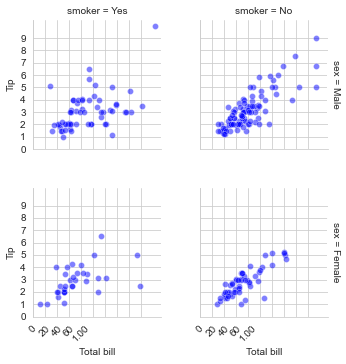

In [86]:
with sns.axes_style('whitegrid'):
    g=sns.FacetGrid(tips,row='sex',col='smoker',margin_titles=True,size=2.5)
g.map(plt.scatter,'total_bill','tip',color='blue',edgecolor='white',lw=0.5,alpha=0.5)
g.set_axis_labels('Total bill','Tip')
g.set(xticks=np.arange(0,50,5).tolist(),yticks=np.arange(0,10,1).tolist()).set_xticklabels(rotation=45)
g.fig.subplots_adjust(wspace=0.3,hspace=0.3) # wspace和hspace设置子图之间的间隔

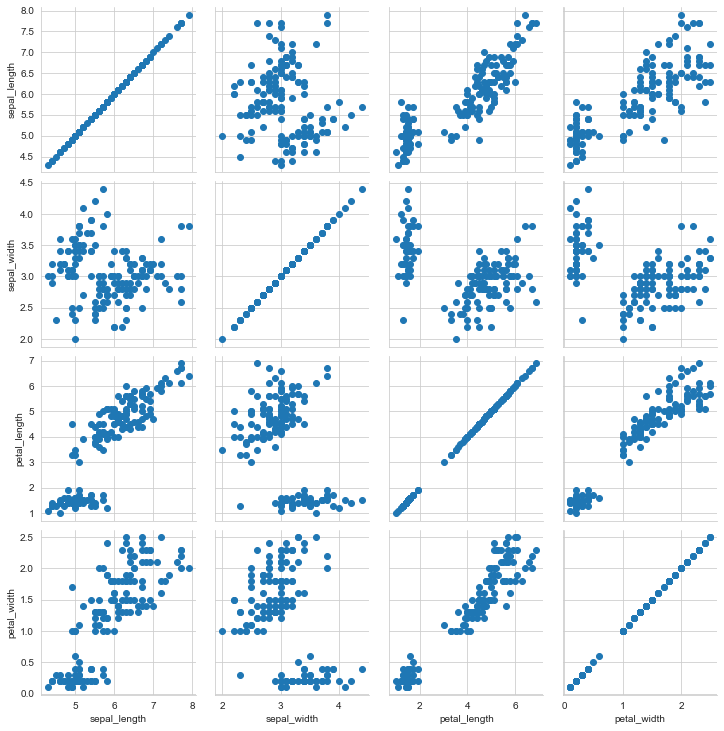

In [87]:
iris=sns.load_dataset('iris')
g=sns.PairGrid(iris)
g.map(plt.scatter)

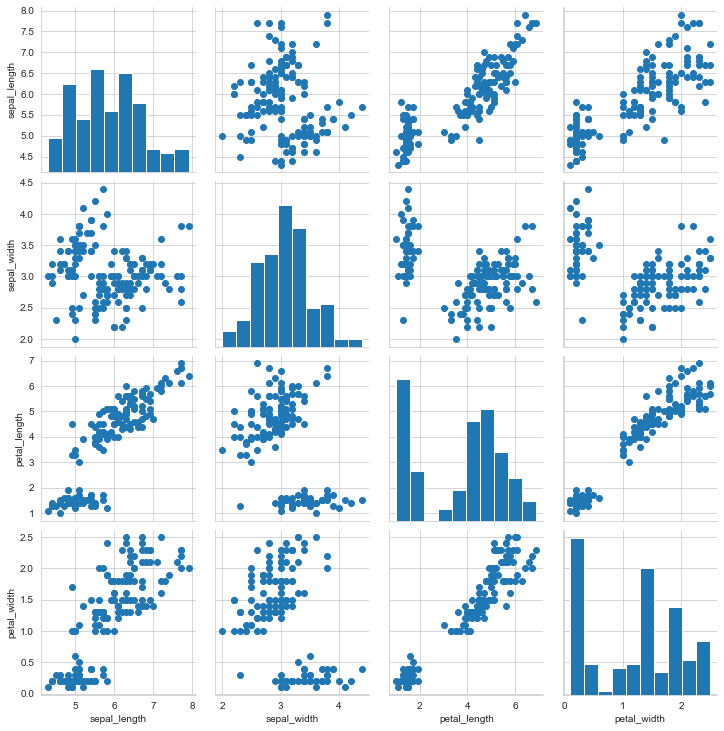

In [88]:
g=sns.PairGrid(iris)
g.map_diag(plt.hist) # 对角线画柱状图
g.map_offdiag(plt.scatter) # 非对角线画散点图 

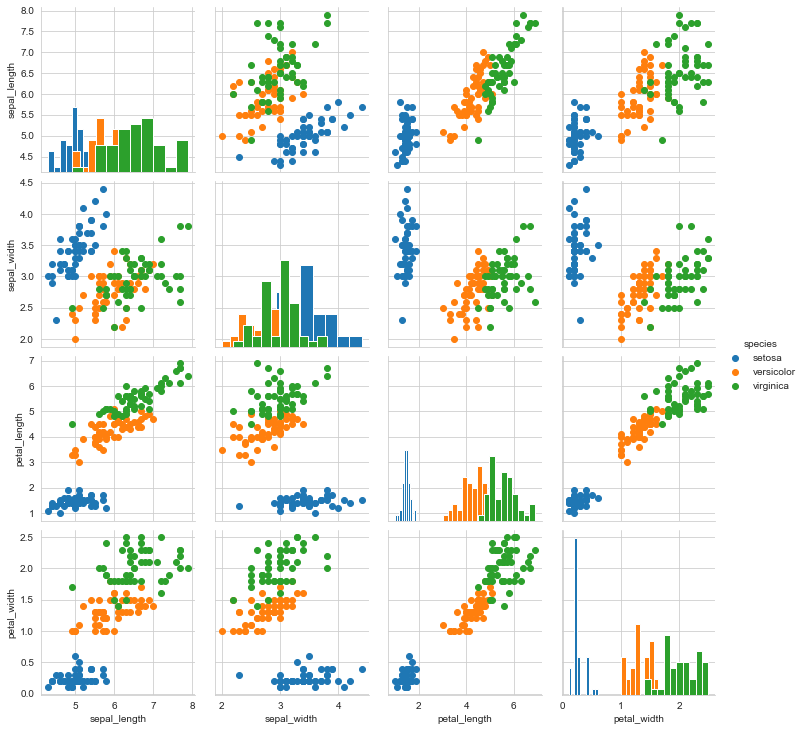

In [89]:
g=sns.PairGrid(iris,hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

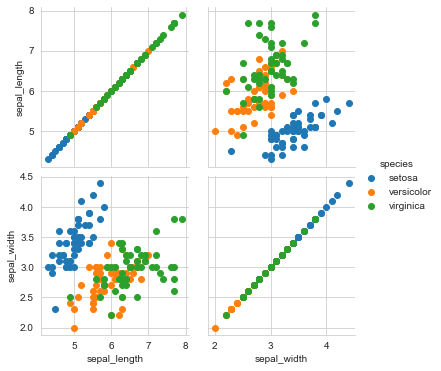

In [91]:
g=sns.PairGrid(iris,vars=['sepal_length','sepal_width'],hue='species')
g.map(plt.scatter)
g.add_legend()

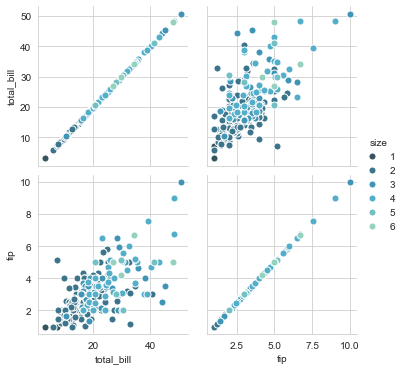

In [95]:
g=sns.PairGrid(tips,hue='size',palette='GnBu_d')
g.map(plt.scatter,s=50,edgecolor='white') # edgecolor表示边缘颜色
g.add_legend()

# 热力图

In [96]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [99]:
# df.pivot用法
flights=flights.pivot('month','year','passengers') # 列索引，行索引 值
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


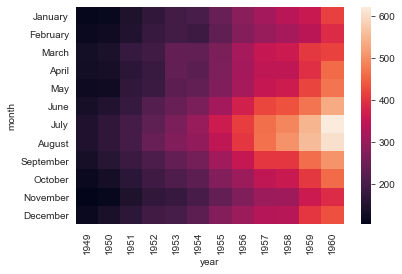

In [100]:
ax=sns.heatmap(flights)

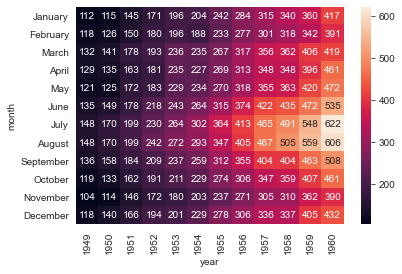

In [101]:
# 添加注释
ax=sns.heatmap(flights,annot=True,fmt='d')

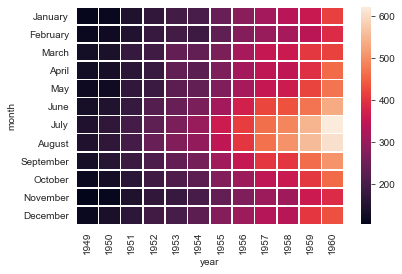

In [102]:
# 增加间距
x=sns.heatmap(flights,linewidths=0.5)

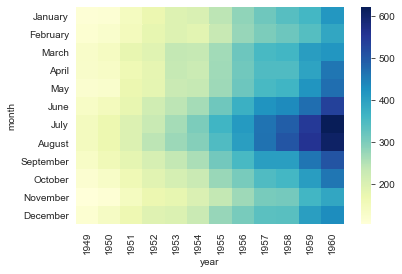

In [103]:
ax=sns.heatmap(flights,cmap='YlGnBu') # Yl 黄 ，Gn 绿，Bu 蓝

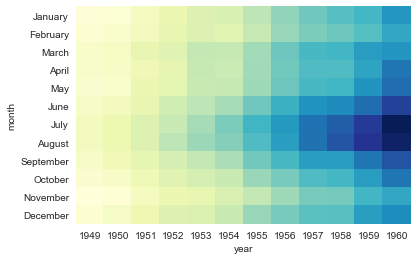

In [104]:
# 隐藏cbar
ax=sns.heatmap(flights,cmap='YlGnBu',cbar=False) # Yl 黄 ，Gn 绿，Bu 蓝